<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

# implementation of adagrad for Batch GD

In [432]:
import numpy as np
import matplotlib.pyplot as plt

In [433]:
data=np.genfromtxt('/home/mnasser/ITI Ai-pro/Numerical Optimization/DataSets/student_scores.csv',delimiter=',',skip_header=1)

In [434]:
print(data)

[[ 2.5 21. ]
 [ 5.1 47. ]
 [ 3.2 27. ]
 [ 8.5 75. ]
 [ 3.5 30. ]
 [ 1.5 20. ]
 [ 9.2 88. ]
 [ 5.5 60. ]
 [ 8.3 81. ]
 [ 2.7 25. ]
 [ 7.7 85. ]
 [ 5.9 62. ]
 [ 4.5 41. ]
 [ 3.3 42. ]
 [ 1.1 17. ]
 [ 8.9 95. ]
 [ 2.5 30. ]
 [ 1.9 24. ]
 [ 6.1 67. ]
 [ 7.4 69. ]
 [ 2.7 30. ]
 [ 4.8 54. ]
 [ 3.8 35. ]
 [ 6.9 76. ]
 [ 7.8 86. ]]


In [435]:
x=data[:,0].reshape(len(data),1)
y=data[:,1].reshape(len(data),1)

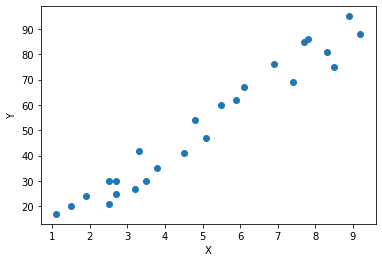

In [436]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [437]:
def adagradGD(x,y,alph,epsi,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        vt_0=vt_0+theta0_grd**2
        vt_1=vt_1+theta1_grd**2
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

In [438]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adagradGD(x,y,0.3,1e-8,1000)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")
print(f"Predicted Values \n {y_predict}")

Theta_0 = 8.101872450096254, Theta_1 = 8.756204245149062
Predicted Values 
 [[29.99167261]
 [52.75666882]
 [36.12071005]
 [82.52627925]
 [38.74744038]
 [21.23590484]
 [88.65531669]
 [56.25897593]
 [80.77512569]
 [31.74282616]
 [75.52166503]
 [59.76128304]
 [47.50320816]
 [36.99628683]
 [17.73359773]
 [86.02858636]
 [29.99167261]
 [24.73821194]
 [61.51243659]
 [72.8949347 ]
 [31.74282616]
 [50.12993849]
 [41.37417071]
 [68.51705081]
 [76.39724181]]


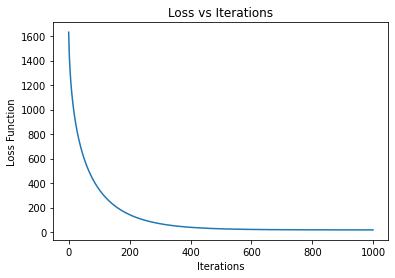

In [439]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

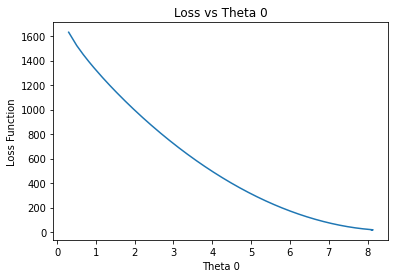

In [440]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

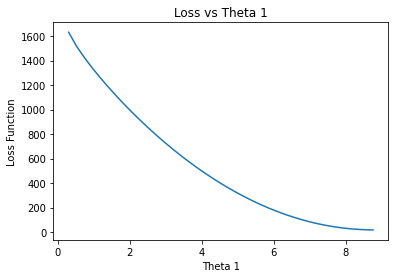

In [441]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

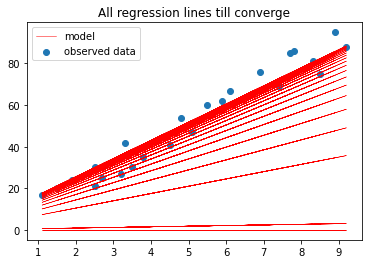

In [442]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),50):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

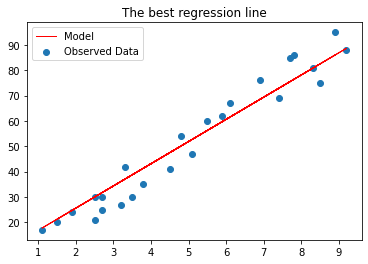

In [443]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [444]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9421615582661286


# implementation of RmsProp for Batch GD

In [445]:
def rmspropGD(x,y,alph,epsi,b,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    beta=b
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        vt_0=beta*vt_0+(1-beta)*theta0_grd**2
        vt_1=beta*vt_1+(1-beta)*theta1_grd**2
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

### Here we can see we just need 80 iterations to reach the same accuracy or better becuase the accumulation of the gradient square in adagrad killed the learning rate and it had needed way more iteraions to reach the minima.
### otherwise adagrad,here in rmsprop we just take proportion of the history of gradient square not all history.

In [446]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=rmspropGD(x,y,0.3,1e-8,0.9,80)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 5.072378655420111, Theta_1 = 9.347390293554412
Predicted Values 
 [[28.50995775]
 [52.76202482]
 [35.03936042]
 [84.47626638]
 [37.83767585]
 [19.18223964]
 [91.00566905]
 [56.49311206]
 [82.61072276]
 [30.37550137]
 [77.01409189]
 [60.2241993 ]
 [47.16539396]
 [35.97213223]
 [15.4511524 ]
 [88.20735362]
 [28.50995775]
 [22.91332688]
 [62.08974293]
 [74.21577646]
 [30.37550137]
 [49.96370939]
 [40.63599128]
 [69.55191741]
 [77.94686371]]


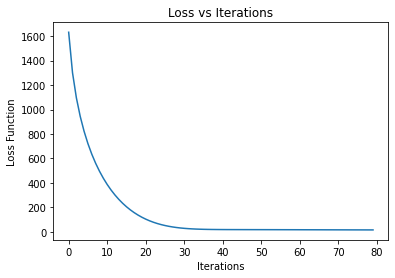

In [447]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

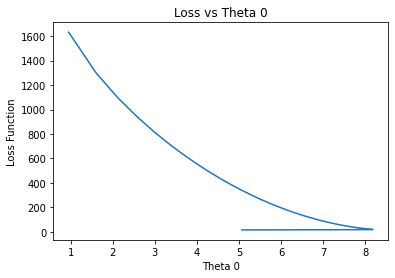

In [448]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

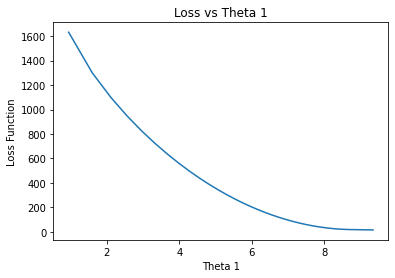

In [449]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

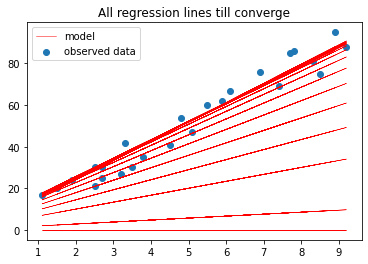

In [450]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),5):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

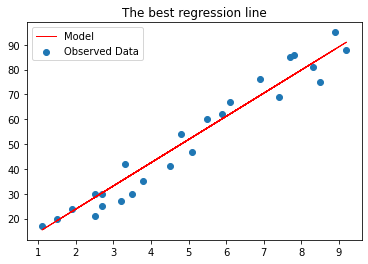

In [451]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [452]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.950800494540382


# implementation of Adam for Batch GD

In [453]:
def adamGD(x,y,alph,epsi,b1,b2,max_iter):
    theta_0 = 0.0
    theta_1 = 0.0
    alpha = alph
    epsilon=epsi
    beta_1=b1
    beta_2=b2
    mt_0=0.0
    mt_1=0.0
    vt_0=0.0
    vt_1=0.0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        mt_0=beta_1*mt_0+(1-beta_1)*theta0_grd
        mt_1=beta_1*mt_1+(1-beta_1)*theta1_grd
        vt_0=beta_2*vt_0+(1-beta_2)*theta0_grd**2
        vt_1=beta_2*vt_1+(1-beta_2)*theta1_grd**2
        mt_0=mt_0/(1-pow(beta_1,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        mt_1=mt_1/(1-pow(beta_1,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        vt_0=vt_0/(1-pow(beta_2,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        vt_1=vt_1/(1-pow(beta_2,i+1)) #Bias correction # (i+1) to avoid dividing by zero in the 0th iteration
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * mt_0
        theta0_list.append(theta_0)
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * mt_1
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

### Here we need less iterations to reach almost the same accuracy because of the momentum term.
### But if we want higher accuracy we increase the iterations way more because the momentum term makes loss function oscillates around minima ,so it needs higher iterations to exactly reach the minima


In [454]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adamGD(x,y,0.25,1e-8,0.9,0.95,50)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 8.644494193317906, Theta_1 = 8.645340130069577
Predicted Values 
 [[30.25289828]
 [52.72710809]
 [36.30364707]
 [82.11645938]
 [38.89682513]
 [21.60897143]
 [88.16720817]
 [56.18467883]
 [80.38767401]
 [31.98168365]
 [75.2013179 ]
 [59.64224957]
 [47.54075198]
 [37.16803976]
 [18.15140069]
 [85.57403011]
 [30.25289828]
 [25.06654217]
 [61.37103494]
 [72.60813984]
 [31.98168365]
 [50.13393003]
 [41.49000318]
 [68.28617642]
 [76.06571058]]


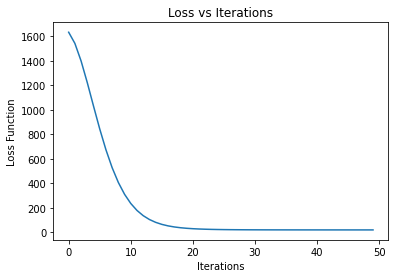

In [455]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

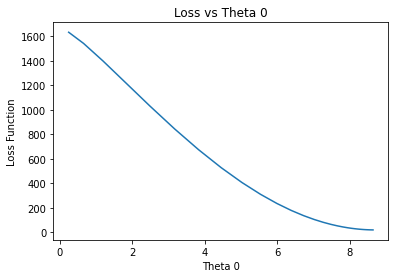

In [456]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

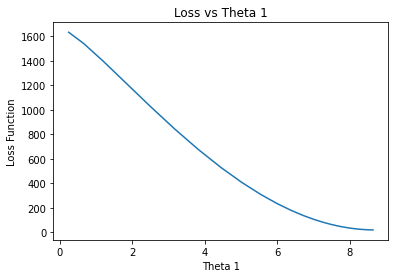

In [457]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

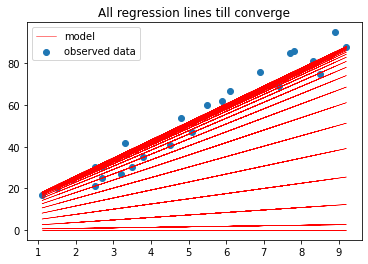

In [458]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),2):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

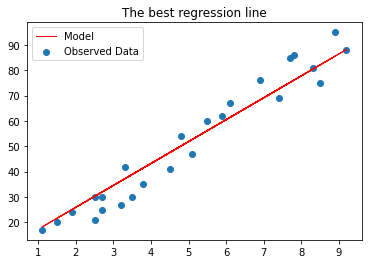

In [459]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [460]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9398059698560793


### Here we try to increase the accuracy a little bit by increasing the iterations to reach exactly the minima

In [461]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict=adamGD(x,y,0.25,1e-8,0.9,0.95,1000)
print(f"Theta_0 = {theta_0}, Theta_1 = {theta_1}")                                           
print(f"Predicted Values \n {y_predict}")                                                 

Theta_0 = 2.492640411921092, Theta_1 = 9.784770424417164
Predicted Values 
 [[26.88845498]
 [52.27974669]
 [33.72457198]
 [85.48374353]
 [36.65433641]
 [17.12257356]
 [92.31986053]
 [56.18609926]
 [83.53056724]
 [28.84163127]
 [77.67103839]
 [60.09245182]
 [46.42021783]
 [34.70116012]
 [13.21622099]
 [89.3900961 ]
 [26.88845498]
 [21.02892613]
 [62.04562811]
 [74.74127396]
 [28.84163127]
 [49.34998226]
 [39.58410083]
 [69.85833325]
 [78.64762653]]


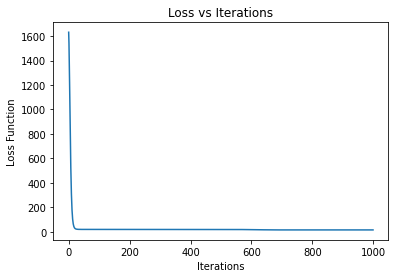

In [462]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss vs Iterations")
plt.show()

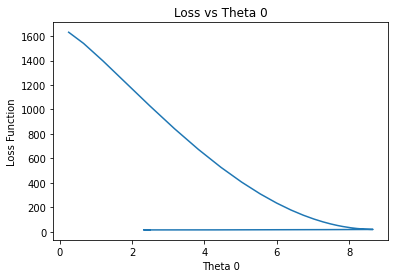

In [463]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta 0")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 0")
plt.show()

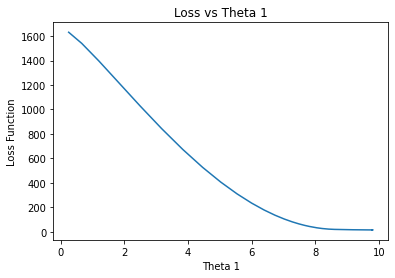

In [464]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta 1")
plt.ylabel("Loss Function")
plt.title("Loss vs Theta 1")
plt.show()

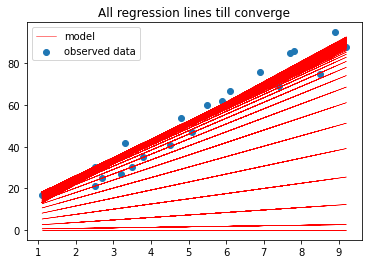

In [465]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict_list[0],color='red',label='model',linewidth=0.5)
for i in range(1,len(y_predict_list),2):
    plt.plot(x,y_predict_list[i],color='red',linewidth=0.5)
plt.title("All regression lines till converge")
plt.legend()
plt.show()

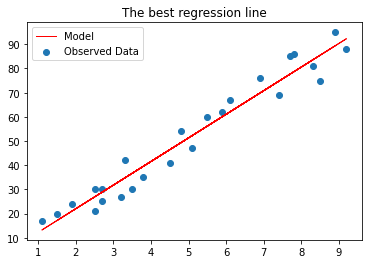

In [466]:
# Before fitting 
plt.scatter(x, y,label="Observed Data")
# After fitting
plt.plot(x, y_predict,label="Model", color='r',linewidth=1)
plt.title("The best regression line")
plt.legend()
plt.show()

In [467]:
# Evaluting the fitting of the model
y_predict = theta_0 + theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9529426606231977
